In [1]:
#import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read Two Files into dataframe
df_pb=pd.read_csv("D:\\Projects\\Quantium\\QVI_purchase_behaviour.csv")
df_td=pd.read_excel("D:\\Projects\\Quantium\\QVI_transaction_data.xlsx")

In [3]:
# Convert DATE Format

In [4]:
df_td['DATE'] = pd.to_datetime(df_td['DATE'],unit='D', origin='1899-12-30')

In [5]:
df_td.head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0


In [6]:
#Clean the data and add columns
df_td['PROD_SIZE'] = df_td['PROD_NAME'].str.extract(r'(\d+g)')
df_td['PROD_NAME'] = df_td['PROD_NAME'].str[:-1 * len(df_td['PROD_SIZE'][0])]
df_td['PROD_SIZE'] = df_td['PROD_SIZE'].str[:-1 * 1 ]

In [7]:
df_td['PROD_NAME']=df_td['PROD_NAME'].str.strip()
df_td['BRAND'] = df_td['PROD_NAME'].str.split().str[0]

In [8]:
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle


In [9]:
df_td['PROD_SIZE'] = pd.to_numeric(df_td['PROD_SIZE'])

In [10]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PROD_SIZE       258772 non-null  float64       
 9   BRAND           264836 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 20.2+ MB


In [11]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
df_pb.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [13]:
df_td.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_SIZE
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,258772.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.325804
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.957108


In [14]:
df_td.isnull().sum()

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
PROD_SIZE         6064
BRAND                0
dtype: int64

In [15]:
# Clean The dataset
df_td.loc[df_td['BRAND'] == 'Dorito', 'BRAND'] = 'Doritos'
df_td.loc[df_td['BRAND'] == 'Smith', 'BRAND'] = 'Smiths'
df_td.loc[df_td['BRAND'] == 'Infzns', 'BRAND'] = 'Infuzions'
df_td.loc[df_td['BRAND'] == 'Snbts', 'BRAND'] = 'Sunbites'

df_td.loc[df_td['BRAND'] == 'RRD', 'BRAND'] = 'Red'
df_td.loc[df_td['BRAND'] == 'NCC', 'BRAND'] = 'Natural'
df_td.loc[df_td['BRAND'] == 'Old', 'BRAND'] = 'Old El Paso'

In [16]:
df_td_group=df_td.groupby("BRAND")
Prod_qty_sum=df_td_group.PROD_QTY.sum()
Total_sales_sum=df_td_group.TOT_SALES.sum()
PROD_SIZE_sum=df_td_group.PROD_SIZE.sum()

df_td_sum=pd.DataFrame({
    "Product_Quantity_Sum":Prod_qty_sum,
    "Total_Sales_sum":Total_sales_sum,
    "PROD_SIZE_sum":PROD_SIZE_sum
    
})

df_td_sum

,Product_Quantity_Sum,Total_Sales_sum,PROD_SIZE_sum
BRAND,,,
Burger,2970,6831.0,344080.0
CCs,8609,18078.9,796425.0
Cheetos,5530,16884.5,519930.0
Cheezels,8747,40029.9,1220920.0
Cobs,18571,70569.8,1066230.0
Doritos,54216,241890.9,6194370.0
French,2643,7929.0,248150.0
Grain,11962,43048.8,665070.0
GrnWves,2764,8568.4,264240.0


<AxesSubplot:>

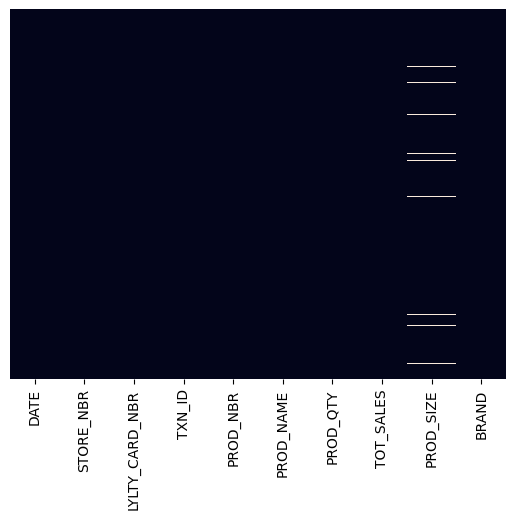

In [17]:
sns.heatmap(df_td.isnull(),yticklabels=False,cbar=False)

In [18]:
df_td_corr=df_td.drop(["PROD_NAME","DATE","BRAND"],axis=1)

In [19]:
df_td_corr.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_SIZE
STORE_NBR,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234,0.000309
LYLTY_CARD_NBR,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908,0.000771
TXN_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468,0.000277
PROD_NBR,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851,-0.231597
PROD_QTY,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307,0.008050
TOT_SALES,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000,0.308069
PROD_SIZE,0.000309,0.000771,0.000277,-0.231597,0.008050,0.308069,1.000000


<AxesSubplot:>

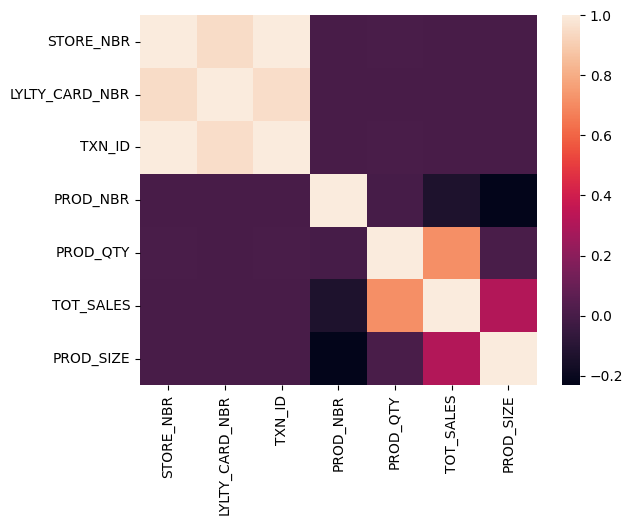

In [20]:
sns.heatmap(df_td_corr.corr())

In [21]:
df_td["PROD_SIZE"]=df_td["PROD_SIZE"].fillna(df_td["PROD_SIZE"].mean())

<AxesSubplot:xlabel='PROD_SIZE', ylabel='Count'>

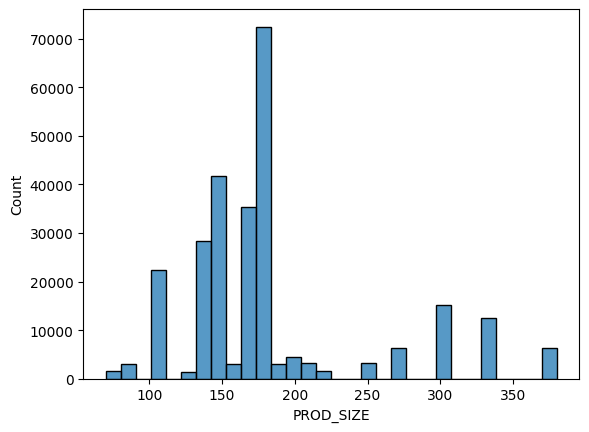

In [22]:
sns.histplot(data=df_td,x="PROD_SIZE",bins=30)

<AxesSubplot:xlabel='TOT_SALES'>

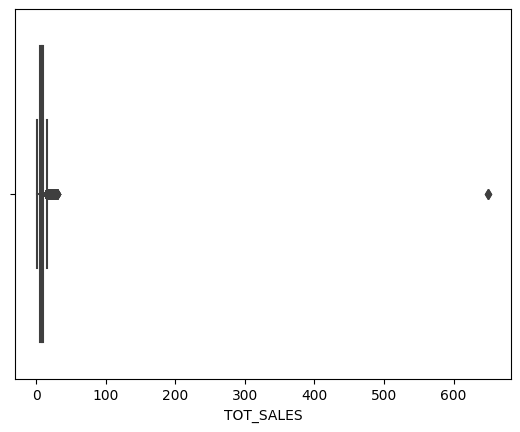

In [23]:
sns.boxplot(data=df_td,x="TOT_SALES")

<AxesSubplot:xlabel='PROD_QTY'>

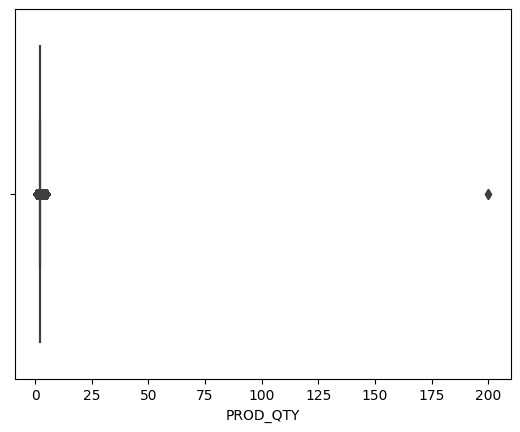

In [24]:
sns.boxplot(data=df_td,x="PROD_QTY")

In [25]:
# Remove OUtlier Based On Total Sales
z=np.percentile(df_td["TOT_SALES"],[25,75])
IQR=z[1]-z[0]
lower=z[0]-1.5*IQR
upper=z[1]+1.5*IQR
lower=np.round(lower,2)
upper=np.round(upper,2)
print(upper,lower)

14.9 -0.3


In [27]:
#outlier=df_td[(df_td["TOT_SALES"]>upper) & (df_td["TOT_SALES"]<lower) & (df_td["PROD_QTY"] > 15) ].index
#df_td=df_td.drop(outlier)

outliers = df_td[(df_td["TOT_SALES"] > upper)  & (df_td["PROD_QTY"] > 15)].index
df_td=df_td.drop(outliers)

In [28]:
df_td

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150.0,Doritos


<AxesSubplot:xlabel='TOT_SALES'>

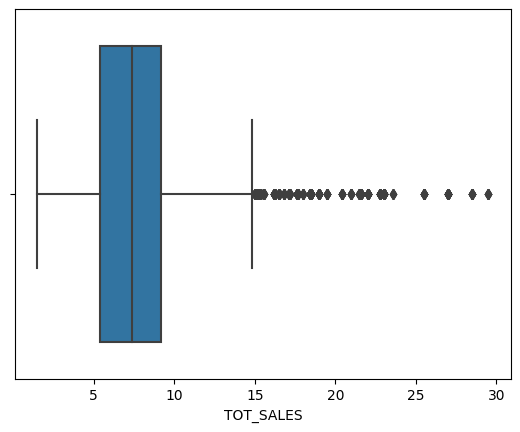

In [29]:
sns.boxplot(data=df_td,x="TOT_SALES")

In [30]:
#Combine Two Data Frame Transaction and Personal Behaviour
df=pd.merge(df_td,df_pb, on="LYLTY_CARD_NBR")
df=df.sort_values("DATE")
df=df.reset_index(drop=True)

In [31]:
import datetime as dt
df['Month_Year'] = df['DATE'].dt.strftime('%m-%Y')
df['Quarter'] = df['DATE'].dt.to_period('Q')
df['Quarter'] = df['Quarter'].dt.to_timestamp()

In [32]:
df.head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month_Year,Quarter
0,2018-07-01,27,27181,24218,70,Tyrrells Crisps Lightly Salted,2,8.4,165.0,Tyrrells,RETIREES,Budget,07-2018,2018-07-01
1,2018-07-01,191,191099,192367,103,RRD Steak & Chimuchurri,2,5.4,150.0,Red,YOUNG FAMILIES,Budget,07-2018,2018-07-01
2,2018-07-01,257,257010,255769,24,Grain Waves Sweet Chilli,2,7.2,210.0,Grain,YOUNG FAMILIES,Premium,07-2018,2018-07-01
3,2018-07-01,48,48129,43842,114,Kettle Sensations Siracha Lime,2,9.2,150.0,Kettle,OLDER FAMILIES,Mainstream,07-2018,2018-07-01


<AxesSubplot:xlabel='BRAND', ylabel='TOT_SALES'>

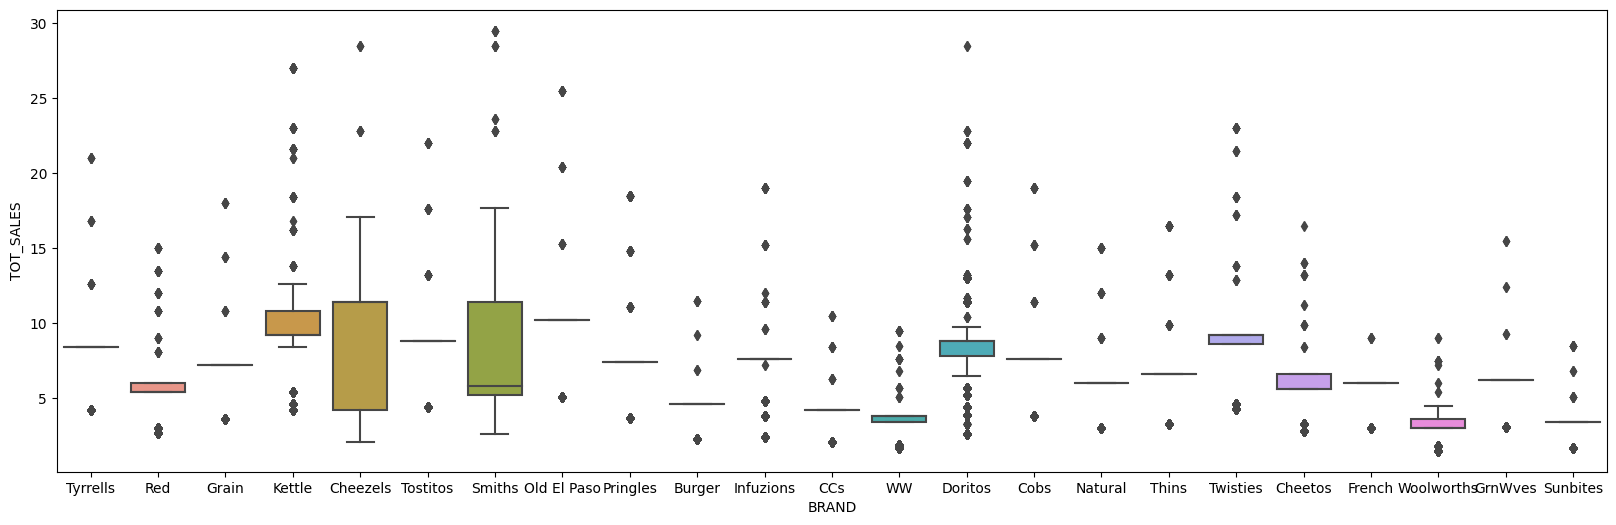

In [33]:
fig = plt.figure(figsize=(20, 6))
sns.boxplot(data=df,y="TOT_SALES",x="BRAND")

<AxesSubplot:xlabel='PROD_SIZE', ylabel='TOT_SALES'>

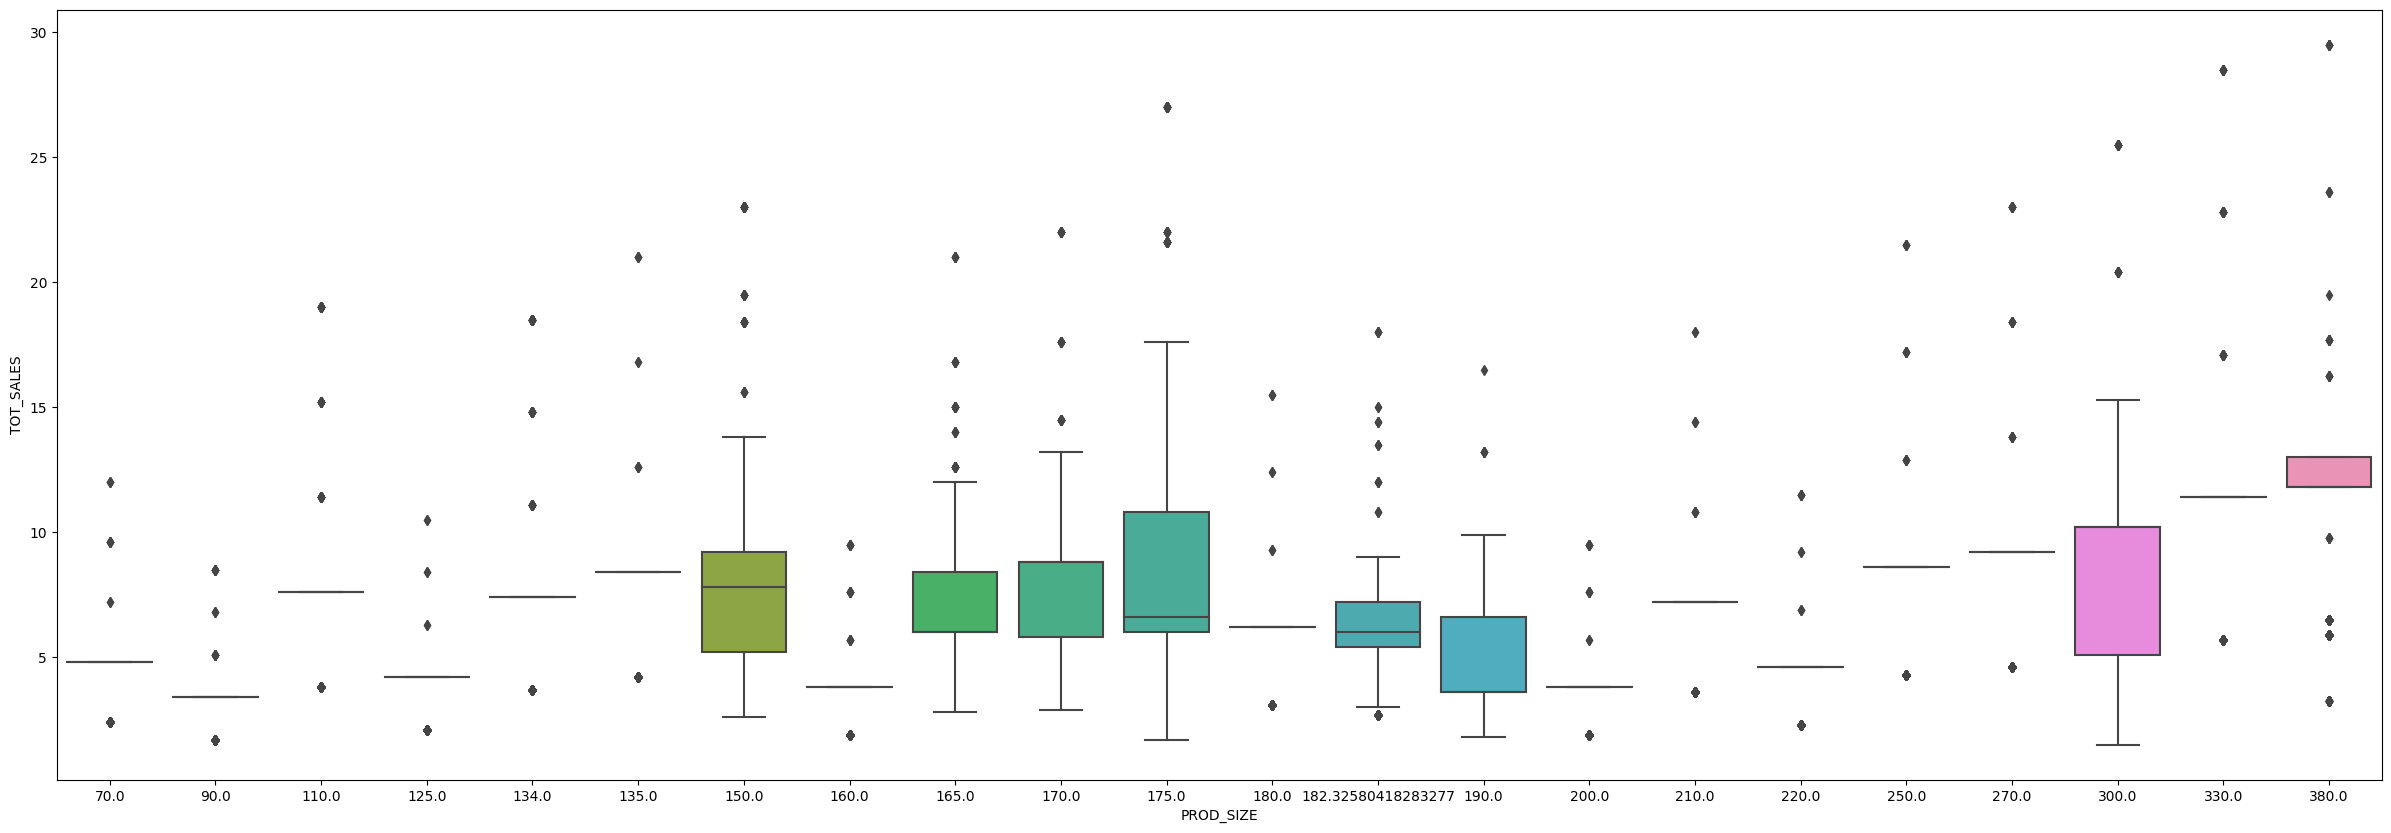

In [34]:
fig = plt.figure(figsize=(30, 10))
sns.boxplot(data=df,x="PROD_SIZE",y="TOT_SALES")

In [35]:
values = df.values
# Extract x and y values
DATE = values[:,12]
Quarter=values[:,13]
TOT_SALES = values[:,7]

In [36]:
values

array([[Timestamp('2018-07-01 00:00:00'), 27, 27181, ..., 'Budget',
        '07-2018', Timestamp('2018-07-01 00:00:00')],
       [Timestamp('2018-07-01 00:00:00'), 191, 191099, ..., 'Budget',
        '07-2018', Timestamp('2018-07-01 00:00:00')],
       [Timestamp('2018-07-01 00:00:00'), 257, 257010, ..., 'Premium',
        '07-2018', Timestamp('2018-07-01 00:00:00')],
       ...,
       [Timestamp('2019-06-30 00:00:00'), 257, 257195, ..., 'Mainstream',
        '06-2019', Timestamp('2019-04-01 00:00:00')],
       [Timestamp('2019-06-30 00:00:00'), 45, 45057, ..., 'Premium',
        '06-2019', Timestamp('2019-04-01 00:00:00')],
       [Timestamp('2019-06-30 00:00:00'), 199, 199122, ..., 'Premium',
        '06-2019', Timestamp('2019-04-01 00:00:00')]], dtype=object)

In [37]:
DATE

array(['07-2018', '07-2018', '07-2018', ..., '06-2019', '06-2019',
       '06-2019'], dtype=object)

In [38]:
TOT_SALES

array([8.4, 5.4, 7.2, ..., 3.8, 4.2, 7.8], dtype=object)

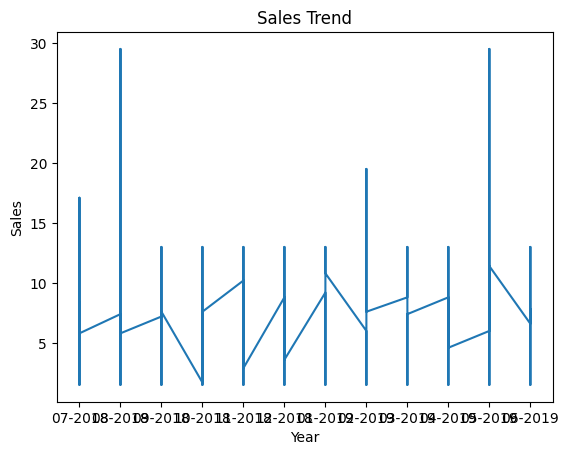

In [39]:
plt.plot(DATE, TOT_SALES)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.show()

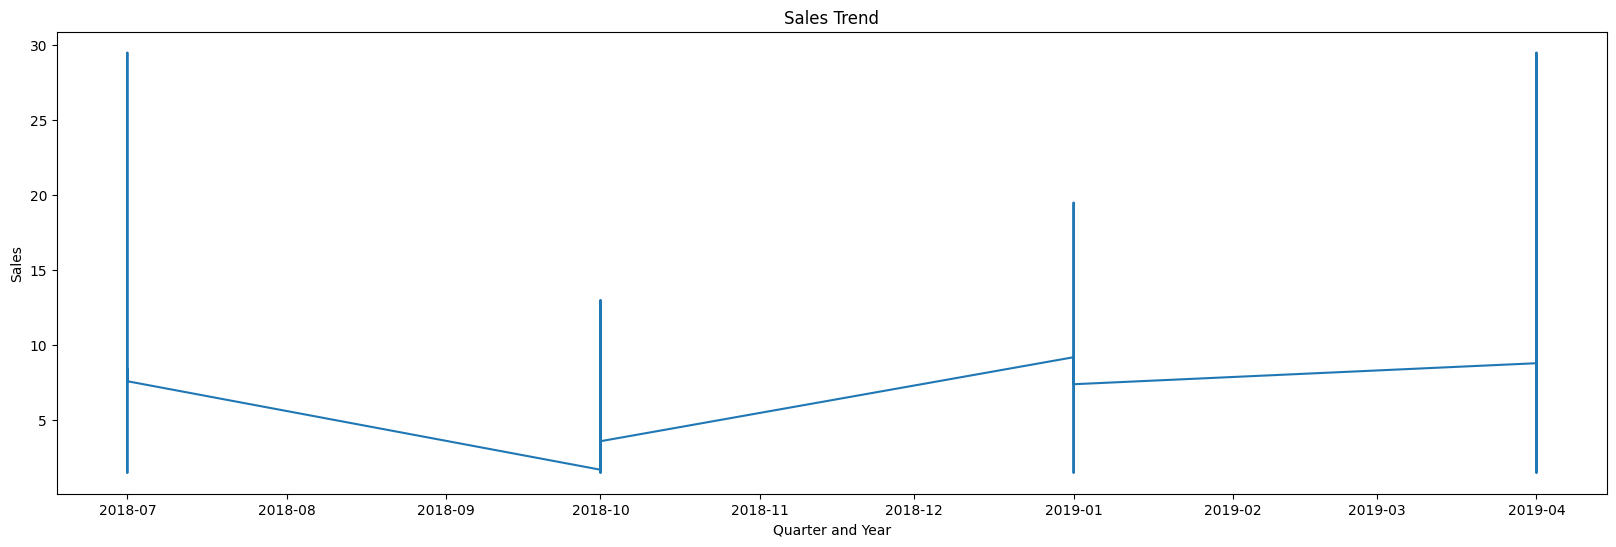

In [40]:
plt.figure(figsize=(20, 6))
plt.plot(Quarter, TOT_SALES)
plt.xlabel('Quarter and Year')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.show()

In [41]:
df1=df[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()
df1.sort_values('TOT_SALES',ascending=False)

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            168363.25
YOUNG SINGLES/COUPLES  Mainstream        157621.60
RETIREES               Mainstream        155677.05
YOUNG FAMILIES         Budget            139345.85
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
OLDER FAMILIES         Mainstream        103445.55
RETIREES               Premium            97646.05
YOUNG FAMILIES         Mainstream         92788.75
MIDAGE SINGLES/COUPLES Mainstream         90803.85
YOUNG FAMILIES         Premium            84025.50
OLDER FAMILIES         Premium            80658.40
YOUNG SINGLES/COUPLES  Budget             61141.60
MIDAGE SINGLES/COUPLES Premium            58432.65
YOUNG SINGLES/COUPLES  Premium            41642.10
MIDAGE SINGLES/COUPLES Budget             35514.80
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10

<AxesSubplot:xlabel='LIFESTAGE', ylabel='TOT_SALES'>

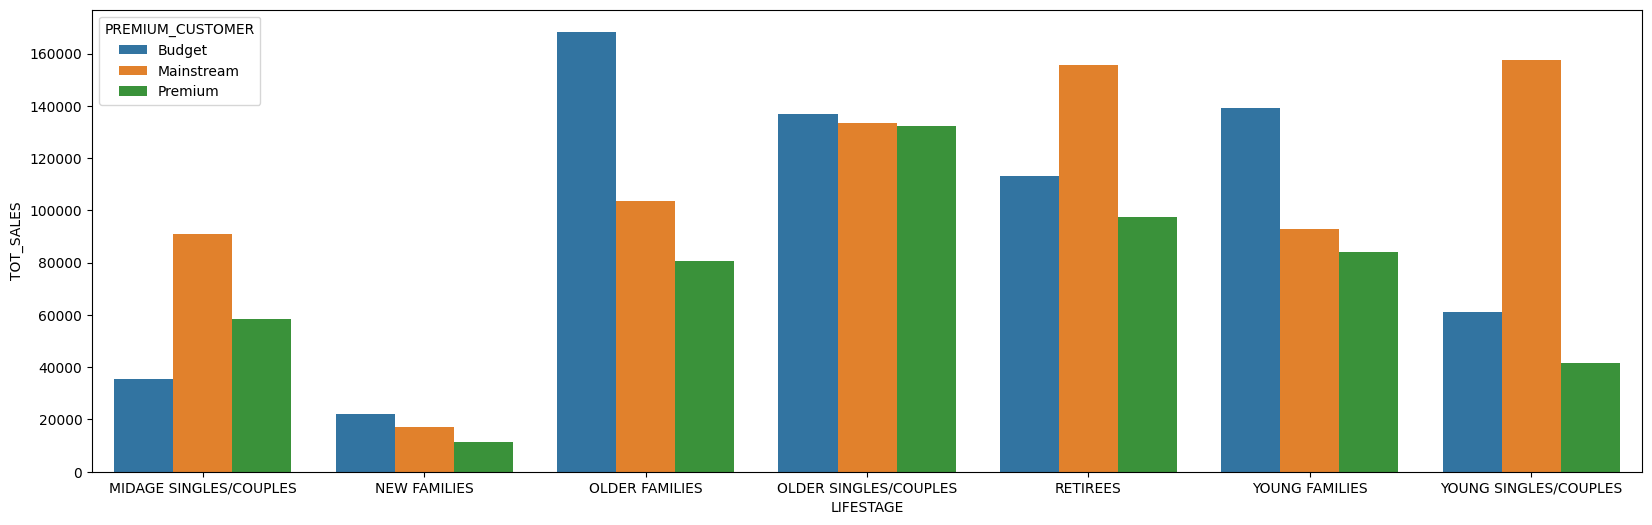

In [42]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(x=df1.reset_index()["LIFESTAGE"],hue=df1.reset_index()["PREMIUM_CUSTOMER"],y=df1.reset_index()["TOT_SALES"])

In [43]:
df2=df_pb.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
df2.columns=['Customer_Count']
df2.sort_values('Customer_Count',ascending=False)

Customer_Count
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2274
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

<AxesSubplot:xlabel='LIFESTAGE', ylabel='Customer_Count'>

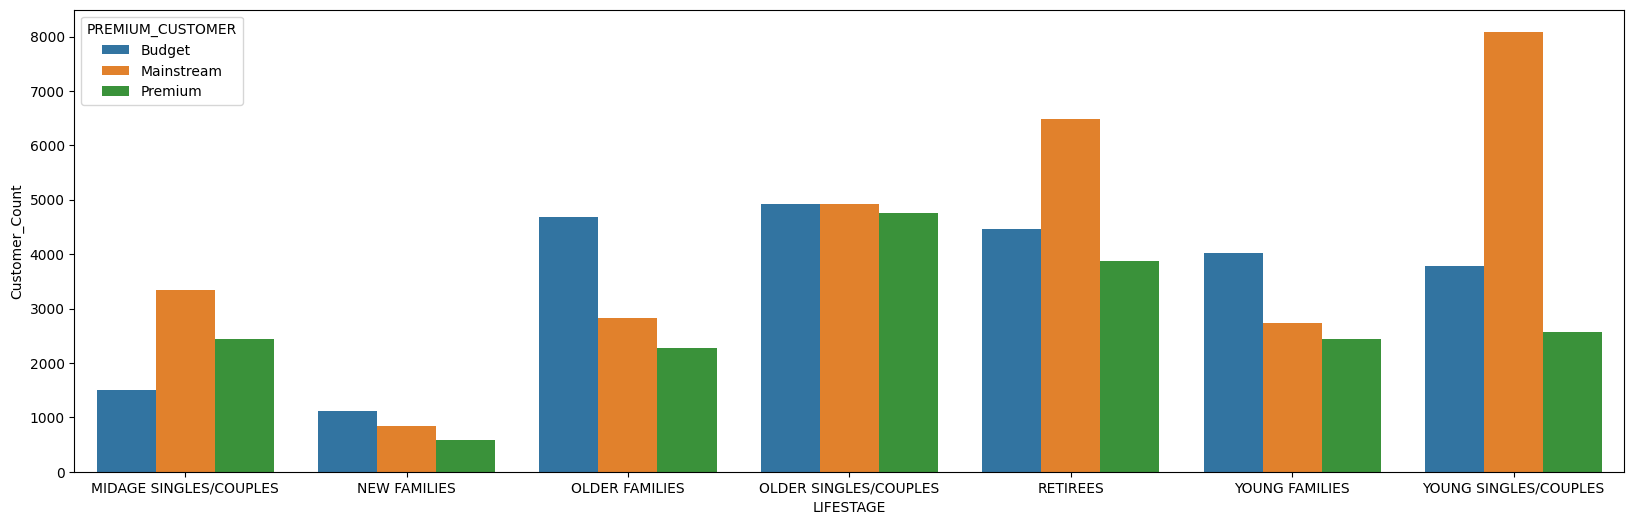

In [44]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(x=df2.reset_index()["LIFESTAGE"],hue=df2.reset_index()["PREMIUM_CUSTOMER"],y=df2.reset_index()["Customer_Count"])

In [45]:
df['CHIP_PRICE']=df['TOT_SALES']/df['PROD_QTY']
df3=df[['LIFESTAGE','PREMIUM_CUSTOMER','CHIP_PRICE']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()
df3.sort_values('CHIP_PRICE',ascending=False)

CHIP_PRICE
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.071485
                 MIDAGE SINGLES/COUPLES    4.000101
Budget           RETIREES                  3.924883
Premium          RETIREES                  3.921323
Budget           NEW FAMILIES              3.919251
Mainstream       NEW FAMILIES              3.916581
Premium          OLDER SINGLES/COUPLES     3.887220
Budget           OLDER SINGLES/COUPLES     3.877022
Premium          NEW FAMILIES              3.871743
Mainstream       RETIREES                  3.833343
                 OLDER SINGLES/COUPLES     3.803800
Budget           YOUNG FAMILIES            3.753659
Premium          MIDAGE SINGLES/COUPLES    3.752915
                 YOUNG FAMILIES            3.752402
Budget           OLDER FAMILIES            3.733344
                 MIDAGE SINGLES/COUPLES    3.728496
Mainstream       OLDER FAMILIES            3.727383
                 YOUNG FAMILIES            3.707097
Premium          OLDER FAMILIES            3.704625
                 YOUNG SINGLES/COUPLES     3.645518
Budget           YOUNG SINGLES/COUPLES     3.637681

In [46]:
df.to_csv("D:\\Projects\\Quantium\\QVI.csv")